=====
epoch 0
loss tensor(72.6215, device='cuda:0')
train_accuracy 0.084
test_accuracy 0.258
=====
epoch 1000
loss tensor(321.7130, device='cuda:0')
train_accuracy 0.713
test_accuracy 0.752
=====
epoch 2000
loss tensor(23.5201, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.910
=====
epoch 3000
loss tensor(22.7402, device='cuda:0')
train_accuracy 0.927
test_accuracy 0.911
=====
epoch 4000
loss tensor(22.6653, device='cuda:0')
train_accuracy 0.927
test_accuracy 0.911
=====
epoch 5000
loss tensor(22.6579, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.911
=====
epoch 6000
loss tensor(22.6575, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.911
=====
epoch 7000
loss tensor(22.6575, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.911
=====
epoch 8000
loss tensor(22.6575, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.911
=====
epoch 9000
loss tensor(22.6575, device='cuda:0')
train_accuracy 0.926
test_accuracy 0.911


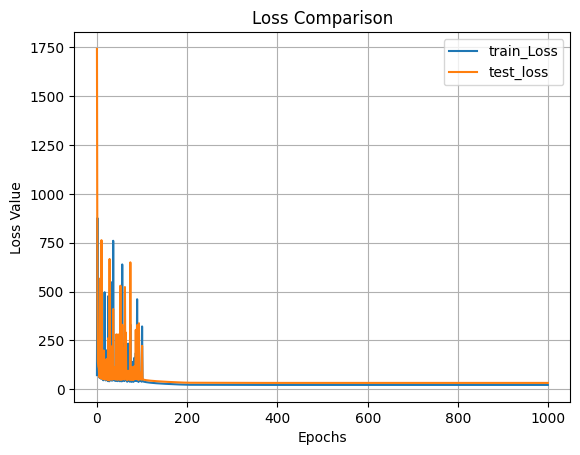

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml
import torch.nn as nn
mnlist = fetch_openml('mnist_784')

mnlist.data.shape, mnlist.target.shape
x_data = mnlist.data
y_data = mnlist.target.astype(int)
#LogisticRegression Model
import torch
from sklearn.model_selection import train_test_split

# device = "cpu"
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train , X_test , y_train , y_test = train_test_split(x_data,y_data,test_size=0.20,random_state=42)
X_train , X_test = torch.Tensor(X_train.values) , torch.Tensor(X_test.values)
y_train , y_test = torch.Tensor(y_train.values) , torch.Tensor(y_test.values)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

class LogisticRegression(torch.nn.Module):
  def __init__(self, input_dim, output_dim):  #클래스 생성자로, 객체가 생성될 때 자동으로 호출
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)
  def forward(self, x):
    outputs = self.linear(x)
    return outputs

#hyper parameters
epochs  = 10000
input_dim = 784
output_dim = 10
lr = 0.01
model = LogisticRegression(input_dim, output_dim)
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)



loss_save_arr = []
loss_save_arr2 = []
from torch.optim import lr_scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)


for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train.long())
    l2_lambda = 0.001
    l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
    loss = loss + l2_lambda * l2_norm
    loss.backward()
    optimizer.step()
    scheduler.step()

    if i % 10 == 0:
        # Train Loss 저장
        loss_save_arr.append(loss.data)
        model.eval()
        with torch.no_grad():
            output_test = model(X_test)
            loss_test = criterion(output_test, y_test.long())
        loss_save_arr2.append(loss_test.data)

    if i % 1000 == 0:
        print("=====")
        print('epoch', i)
        print('loss', loss.data)
        _, pred = torch.max(output.data, axis=1)
        print("train_accuracy {:0.3f}".format(float((pred == y_train).sum()) / y_train.size(0)))

        _, pred = torch.max(output_test.data, axis=1)
        print("test_accuracy {:0.3f}".format(float((pred == y_test).sum()) / y_test.size(0)))

import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(1000), [e.to("cpu") for e in loss_save_arr], label='train_Loss')

plt.plot(range(1000), [e.to("cpu") for e in loss_save_arr2], label='test_loss')

plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')

plt.legend()

plt.grid(True)

plt.show()


